# FoNS Datathon 2021 

In [2]:
# Import pandas to store data in tables (called DataFrames)
import pandas as pd

# numpy arrays to store numbers in vector sequences - only used for plotting graphs here
import numpy as np

# matplotlib is the graphical library used to show the correlation between
# predicted values and actual values.
import matplotlib.pyplot as plt

# sklearn (sci-kit-learn) is the library which contains all the machine learning algortihms.
from sklearn import *


In [3]:
# Import the training datasets via pandas "read_csv(filepath.csv)" function.
# As the files are in the same folder as the "Getting_started.ipynb" notebook file
# we dont need to include a filepath, just the name of the file.
train_descriptors = pd.read_csv("train_descriptors.csv")
train_mord3d = pd.read_csv("train_mord3d.csv")
train_morgan = pd.read_csv("train_morgan.csv")
train_rdk = pd.read_csv("train_rdk.csv")

train_crystals = pd.read_csv("train_crystals.csv")
train_distances = pd.read_csv("train_distances.csv")
train_centroid_distances = pd.read_csv("train_centroid_distances.csv")

In [4]:
# Same as above for the test sets
test_descriptors = pd.read_csv("test_descriptors.csv")
test_mord3d = pd.read_csv("test_mord3d.csv")
test_morgan = pd.read_csv("test_morgan.csv")
test_rdk = pd.read_csv("test_rdk.csv")

In [5]:
train_rdk

,0,1,2,3,4,5,6,7,8,9,...,1015,1016,1017,1018,1019,1020,1021,1022,1023,1024
0,COXSUE,0,0,0,0,0,1,1,0,0,...,1,1,1,0,0,1,0,1,1,1
1,TUWFAU,1,0,1,0,1,1,1,1,0,...,1,0,1,1,1,1,0,1,1,1
2,DUTHEG,1,1,1,1,1,1,0,0,1,...,0,0,0,1,0,0,1,1,1,0
3,AXUDED08,0,0,1,0,0,0,1,0,1,...,0,1,0,1,0,1,0,0,1,1
4,ARAGUV,1,1,1,1,1,1,0,1,1,...,1,0,0,1,0,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13444,GICQAN01,0,1,1,1,0,1,1,1,1,...,0,1,1,1,1,0,1,0,0,0
13445,UNDECO,0,0,0,1,1,1,0,0,1,...,0,0,0,0,0,0,1,0,1,0
13446,IHECIH,1,1,1,1,0,1,1,0,1,...,1,0,1,1,1,1,1,0,1,1
13447,MQUCXA11,1,0,1,1,0,1,1,1,0,...,0,1,1,1,1,1,0,1,1,1


### Data pre-processing

In [6]:
# Take all the rows of the train_morgan DataFrame (:), and make a new DataFrame
# which only contains data from the second column up to the last column (1:).
# Drop any columns which have missing data (.dropna(...)).
train_morgan_full = train_morgan.iloc[:, 1:].dropna(axis= 1, how="any")

# Comparing the two, we see a loss of 1 columns (identifier name column).
# Train_morgan_full can now be used to train a regression algorithm
print(train_morgan.shape)
print(train_morgan_full.shape)

(13449, 1025)
(13449, 1024)


In [7]:
# Take all the rows of the train_rdk DataFrame (:), and make a new DataFrame
# which only contains data from the second column up to the last column (1:).
# Drop any columns which have missing data (.dropna(...)).
train_rdk_full = train_rdk.iloc[:, 1:].dropna(axis= 1, how="any")

# Comparing the two, we see a loss of 1 columns (identifier name column).
# Train_morgan_full can now be used to train a regression algorithm
print(train_rdk.shape)
print(train_rdk_full.shape)

(13449, 1025)
(13449, 1024)


In [8]:
# Make sure that the test set has all the same data as the training set.
test_morgan_full = test_morgan[train_morgan_full.columns]
test_morgan_full.shape

(3363, 1024)

In [9]:
# Make sure that the test set has all the same data as the training set.
test_rdk_full = test_rdk[train_rdk_full.columns]
test_rdk_full.shape

(3363, 1024)

In [10]:
# Checking that the test set contains no missing values either.
test_morgan_full_na = test_morgan_full.dropna(axis= 1, how="any")
test_morgan_full_na.shape

(3363, 1024)

In [11]:
# Checking that the test set contains no missing values either.
test_rdk_full_na = test_rdk_full.dropna(axis= 1, how="any")
test_rdk_full_na.shape

(3363, 1024)

### A (very!!) simple and bad model

sklearn docs for linear regression: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html?highlight=linear%20regression#sklearn.linear_model.LinearRegression

In [23]:
train_crystal_y, test_crystals_y, train_rdk_full_x, test_rdk_full_x = model_selection.train_test_split(train_crystals,train_rdk_full, test_size=0.2, train_size=0.8)

,1,2,3,4,5,6,7,8,9,10,...,1015,1016,1017,1018,1019,1020,1021,1022,1023,1024
11662,1,0,1,0,0,1,0,0,0,0,...,0,1,1,1,1,1,0,1,1,1
12002,1,0,1,0,0,1,0,1,0,1,...,1,0,0,0,1,1,0,0,1,1
1463,0,1,1,0,0,1,0,0,0,0,...,0,1,1,0,0,0,0,1,1,1
9985,1,1,1,1,0,1,1,0,0,0,...,1,1,1,1,1,1,1,0,1,0
8812,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4475,0,1,1,1,0,0,0,0,1,0,...,0,0,1,1,0,0,1,1,0,0
7525,1,0,1,1,1,1,1,0,1,1,...,0,1,1,1,1,1,0,0,1,1
11978,1,1,1,1,0,1,1,0,1,1,...,0,1,1,1,1,1,0,1,1,1
9128,0,0,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0


In [18]:
test

,identifiers,n_heavy_atoms,smiles,a,b,c,alpha,beta,gamma,z_value,...,cell_volume,calculated_density,packing_coefficient,void_volume,is_centrosymmetric,is_sohncke,vdw_inter,vdw_intra,hbond_inter,hbond_intra
2768,NIKYAJ,13,Cc1ccccc1C=C(CBr)C#N,7.5473,11.7362,11.5228,90.0,96.436,90.0,4.0,...,1014.218241,1.546277,0.678950,0.0,True,False,5,9,0,0
4863,ULIVAO,12,Clc1ccc2C(=O)C(=O)Nc2c1,5.6231,4.9930,12.5145,90.0,91.916,90.0,2.0,...,351.162394,1.717231,0.752337,0.0,False,True,9,0,1,0
11437,QAMTUU01,8,Oc1cccc(F)c1,5.6747,5.0760,9.4753,90.0,107.832,90.0,2.0,...,259.821754,1.432897,0.707891,0.0,False,True,4,1,1,0
12648,BZTZAD01,13,OC(=O)CN1N=C2C=CC=CC2=N1,11.7190,8.3080,17.2460,90.0,96.703,90.0,8.0,...,1667.618209,1.411262,0.673550,0.0,True,False,8,0,1,0
3385,IMOGAU,12,OC(O)C(=O)c1ccc(Br)cc1,7.5391,19.8280,5.4014,90.0,90.000,90.0,4.0,...,807.429763,1.900629,0.728947,0.0,False,False,18,6,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10090,SUKXUU,8,IC1=CC=C(S1)C=O,6.5160,6.5770,8.2110,90.0,102.304,90.0,2.0,...,343.805785,2.299465,0.656828,0.0,True,False,6,0,0,0
770,XOMJAK,10,C=CCCCCCCC=C,11.6480,4.9005,8.8190,90.0,105.310,90.0,2.0,...,485.532651,0.945634,0.648377,0.0,True,False,0,0,0,0
10599,MEACAN10,11,CN(C(C)=O)c1ccccc1,17.1510,7.3280,6.7790,90.0,90.000,90.0,4.0,...,852.001857,1.163071,0.664621,0.0,True,False,1,2,0,0
7653,YAZKOZ,14,O=C1CCCCC(=O)NCCCCN1,9.8020,12.9660,9.2000,90.0,112.080,90.0,4.0,...,1083.499994,1.215397,0.671064,0.0,True,False,7,9,2,0


In [30]:
# This step sets up the linear regression algorithm with the target
# to predict the "a" values in the train_crystals DataFrame.
# the training values take the form of the 124 Principal components
# that were extracted from the train_descriptors DataFrame

target = "calculated_density"
model = linear_model.LinearRegression()
model.fit(train_rdk_full_x, train_crystal_y[target])

LinearRegression()

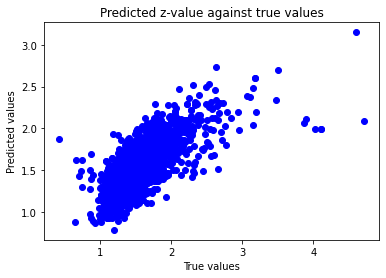

In [32]:
# Now use the fitted regression model to predict
# the "a" values
predictions = model.predict(test_rdk_full_x)

# Plot the true "a" values against the predicted values
plt.plot(test_crystals_y[target], predictions, "bo")
plt.xlabel("True values")
plt.ylabel("Predicted values")
plt.title("Predicted z-value against true values")
plt.show()

### Cross-validation to evaluate the model's performance

sklearn docs on CV: https://scikit-learn.org/stable/modules/cross_validation.html#cross-validation

In [35]:
cv_scores = model_selection.cross_val_score(
    model, 
    train_rdk_full, 
    train_crystals[target], 
    scoring="neg_mean_absolute_error")

print("Average negative MAE:", round(np.mean(cv_scores), 3))
print("Standard deviation:", round(np.std(cv_scores), 3))

Average negative MAE: -0.155
Standard deviation: 0.005


13449

### Outputting predictions for automated checking 
Link: https://github.com/stevenkbennett/fons_datathon_testing

In [76]:
predictions = model.predict(test_morgan_full)

In [78]:
np.savetxt("task_1_predictions.csv", predictions)
# Alternatively, if using pandas, you can use the following:
#pd.DataFrame(predictions).to_csv("task_x_predictions.csv", header=False, index=False)

In [93]:
# Clone main git repo
!git clone https://github.com/stevenkbennett/DA_Summer_School_Hackathon.git

Cloning into 'DA_Summer_School_Hackathon'...
remote: Enumerating objects: 559, done.
remote: Counting objects: 100% (559/559), done.
remote: Compressing objects: 100% (365/365), done.
remote: Total 559 (delta 212), reused 533 (delta 189), pack-reused 0
Receiving objects: 100% (559/559), 35.31 MiB | 6.69 MiB/s, done.
Resolving deltas: 100% (212/212), done.


In [95]:
# change into the git directory
%cd DA_Summer_School_Hackathon

/Users/georgehodgin/DA_Hackathon_Data/train_and_test_sets/DA_Summer_School_Hackathon/DA_Summer_School_Hackathon


In [96]:
!git checkout -b george

Switched to a new branch 'george'


In [99]:
# move prediction csv file into the git folder
!mv ../task_1_predictions.csv DA_Summer_School_Hackathon

In [100]:

!git commit -am "first file upload"

On branch george
Untracked files:
	DA_Summer_School_Hackathon

nothing added to commit but untracked files present


In [101]:
!pwd

/Users/georgehodgin/DA_Hackathon_Data/train_and_test_sets/DA_Summer_School_Hackathon/DA_Summer_School_Hackathon


In [84]:
!cd DA_Summer_School_Hackathon

In [85]:
!pwd

/Users/georgehodgin/DA_Hackathon_Data/train_and_test_sets


In [86]:
%cd DA_Summer_School_Hackathon

/Users/georgehodgin/DA_Hackathon_Data/train_and_test_sets/DA_Summer_School_Hackathon


In [87]:
!pwd

/Users/georgehodgin/DA_Hackathon_Data/train_and_test_sets/DA_Summer_School_Hackathon


In [90]:
!git add task_1_predictions.csv

In [91]:
!git commit -am "first file upload"

[main 6960e68] first file upload
 Committer: George Hodgin <georgehodgin@Georges-MacBook-Pro.local>
Your name and email address were configured automatically based
on your username and hostname. Please check that they are accurate.
You can suppress this message by setting them explicitly. Run the
following command and follow the instructions in your editor to edit
your configuration file:

    git config --global --edit

After doing this, you may fix the identity used for this commit with:

    git commit --amend --reset-author

 1 file changed, 3363 insertions(+)
 create mode 100644 task_1_predictions.csv


In [92]:
!git push

Username for 'https://github.com': ^C
